In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import to_categorical
from matplotlib import pyplot
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb

# Csh124 Dataset


In [ ]:
df_1 = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MiniProject-2-Dataset/csh124/csh124.ann.features.csv"))

In [ ]:
df1 = df_1[['lastSensorEventHours', 'windowDuration', 'prevDominantSensor1', 'prevDominantSensor2','lastSensorID', 'lastSensorLocation', 'lastMotionLocation', 'sensorCount-Bathroom', 'sensorCount-Bedroom', 'sensorCount-Ignore', 'sensorCount-OutsideDoor', 'sensorElTime-Bathroom', 'sensorElTime-DiningRoom', 'sensorElTime-Hall', 'sensorElTime-Ignore', 'sensorElTime-OutsideDoor', 'activity']].copy()

In [ ]:
df1 = df1.drop(df1.index[df1['activity'].isin(['Step_Out', 'Other_Activity', 'Phone', 'Personal_Hygiene', 'Relax', 'Sleep_Out_Of_Bed', 'Drink', 'Dress', 'Evening_Meds', 'Wake_Up', 'Read', 'Morning_Meds', 'Work', 'Work_At_Table', 'Cook_Breakfast', 'Eat_Breakfast', 'Bathe', 'Cook_Lunch', 'Eat_Lunch', 'Wash_Lunch_Dishes', 'Go_To_Sleep', 'Bed_Toilet_Transition', 'Wash_Breakfast_Dishes', 'Groom', 'Cook', 'Eat', 'Wash_Dinner_Dishes', 'Wash_Dishes', 'Take_Medicine', 'Entertain_Guests'])])
df1

,lastSensorEventHours,windowDuration,prevDominantSensor1,prevDominantSensor2,lastSensorID,lastSensorLocation,lastMotionLocation,sensorCount-Bathroom,sensorCount-Bedroom,sensorCount-Ignore,sensorCount-OutsideDoor,sensorElTime-Bathroom,sensorElTime-DiningRoom,sensorElTime-Hall,sensorElTime-Ignore,sensorElTime-OutsideDoor,activity
0,0.0,63.0,0.0,0.0,1.0,1.0,1.0,0.0,33.34,1.01,0.00,86400.0,86400.000000,86400.000000,0.756853,86400.000000,Sleep
1,0.0,63.0,0.0,0.0,5.0,5.0,1.0,0.0,32.33,2.02,0.00,86400.0,86400.000000,86400.000000,0.000000,86400.000000,Sleep
2,0.0,53.0,0.0,0.0,1.0,1.0,1.0,0.0,32.31,2.04,0.00,86400.0,86400.000000,86400.000000,0.023990,86400.000000,Sleep
3,0.0,67.0,0.0,0.0,5.0,5.0,1.0,0.0,31.29,3.06,0.00,86400.0,86400.000000,86400.000000,0.000000,86400.000000,Sleep
4,0.0,65.0,0.0,0.0,1.0,1.0,1.0,0.0,31.26,3.09,0.00,86400.0,86400.000000,86400.000000,0.026903,86400.000000,Sleep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71062,15.0,48.0,5.0,5.0,9.0,9.0,9.0,0.0,12.37,10.58,11.40,86400.0,227.824331,213.428812,3.561320,0.000000,Leave_Home
71063,15.0,48.0,5.0,5.0,5.0,5.0,9.0,0.0,12.48,10.37,11.50,86400.0,228.035583,213.640064,0.000000,0.211252,Leave_Home
71064,15.0,46.0,5.0,5.0,1.0,1.0,1.0,0.0,12.29,10.46,11.60,86400.0,228.066083,213.670564,0.030500,0.241752,Leave_Home
71065,15.0,49.0,5.0,5.0,9.0,9.0,9.0,0.0,12.40,9.25,12.70,86400.0,230.820038,216.424519,2.784455,0.000000,Leave_Home


In [ ]:
columns1 = df1.columns.tolist()
columns1

['lastSensorEventHours',
 'windowDuration',
 'prevDominantSensor1',
 'prevDominantSensor2',
 'lastSensorID',
 'lastSensorLocation',
 'lastMotionLocation',
 'sensorCount-Bathroom',
 'sensorCount-Bedroom',
 'sensorCount-Ignore',
 'sensorCount-OutsideDoor',
 'sensorElTime-Bathroom',
 'sensorElTime-DiningRoom',
 'sensorElTime-Hall',
 'sensorElTime-Ignore',
 'sensorElTime-OutsideDoor',
 'activity']

In [ ]:
activity1 = df1['activity'].unique().tolist()
activity1

['Sleep',
 'Toilet',
 'Leave_Home',
 'Enter_Home',
 'Cook_Dinner',
 'Eat_Dinner',
 'Watch_TV',
 'Work_On_Computer']

In [ ]:
Count1 = df1['activity'].value_counts()
Count1

Sleep               1855
Toilet               856
Leave_Home           652
Enter_Home           483
Work_On_Computer     307
Watch_TV             283
Cook_Dinner          185
Eat_Dinner           125
Name: activity, dtype: int64

In [ ]:
percentage1 = df1['activity'].value_counts(normalize=True)*100
percentage1

Sleep               39.085546
Toilet              18.036241
Leave_Home          13.737885
Enter_Home          10.176991
Work_On_Computer     6.468605
Watch_TV             5.962916
Cook_Dinner          3.898019
Eat_Dinner           2.633797
Name: activity, dtype: float64

# CSH124 Test Dataset

In [ ]:
x_test=df1.drop('activity',axis=1)
y_test=df1['activity']

# Csh125 Dataset

In [ ]:
df_2=pd.DataFrame(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MiniProject-2-Dataset/csh125/csh125.ann.features.csv"))

In [ ]:
#df_128=pd.DataFrame(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MiniProject-2-Dataset/csh128/csh128.ann.features.csv"))

In [ ]:
#df_2=df_125.append(df_128)

In [ ]:
#df_2

In [ ]:
df2 = df_2[['lastSensorEventHours', 'windowDuration', 'prevDominantSensor1', 'prevDominantSensor2','lastSensorID', 'lastSensorLocation', 'lastMotionLocation', 'sensorCount-Bathroom', 'sensorCount-Bedroom', 'sensorCount-Ignore', 'sensorCount-OutsideDoor', 'sensorElTime-Bathroom', 'sensorElTime-DiningRoom', 'sensorElTime-Hall', 'sensorElTime-Ignore', 'sensorElTime-OutsideDoor', 'activity']].copy()

In [ ]:
df2

,lastSensorEventHours,windowDuration,prevDominantSensor1,prevDominantSensor2,lastSensorID,lastSensorLocation,lastMotionLocation,sensorCount-Bathroom,sensorCount-Bedroom,sensorCount-Ignore,sensorCount-OutsideDoor,sensorElTime-Bathroom,sensorElTime-DiningRoom,sensorElTime-Hall,sensorElTime-Ignore,sensorElTime-OutsideDoor,activity
0,1.0,2785.0,0.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,86400.000000,86400.0,86400.0,86400.0,86400.000000,Cook
1,1.0,2784.0,0.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,86400.000000,86400.0,86400.0,86400.0,86400.000000,Cook
2,1.0,891.0,0.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,86400.000000,86400.0,86400.0,86400.0,86400.000000,Cook
3,1.0,896.0,0.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,86400.000000,86400.0,86400.0,86400.0,86400.000000,Cook
4,1.0,70.0,0.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,86400.000000,86400.0,86400.0,86400.0,86400.000000,Cook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216194,19.0,348.0,6.0,6.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,14467.477264,86400.0,86400.0,86400.0,5668.880113,Sleep_Out_Of_Bed
216195,20.0,1881.0,6.0,6.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,16001.159760,86400.0,86400.0,86400.0,7202.562609,Sleep_Out_Of_Bed
216196,20.0,1879.0,6.0,6.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,16002.261677,86400.0,86400.0,86400.0,7203.664526,Sleep_Out_Of_Bed
216197,22.0,9485.0,6.0,6.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,23611.091242,86400.0,86400.0,86400.0,14812.494091,Sleep_Out_Of_Bed


In [ ]:
df2 = df_2.drop(df2.index[df2['activity'].isin(['Step_Out', 'Other_Activity', 'Phone', 'Personal_Hygiene', 'Relax', 'Sleep_Out_Of_Bed', 'Drink', 'Dress', 'Evening_Meds', 'Wake_Up', 'Read', 'Morning_Meds', 'Work', 'Work_At_Table', 'Cook_Breakfast', 'Eat_Breakfast', 'Bathe', 'Cook_Lunch', 'Eat_Lunch', 'Wash_Lunch_Dishes', 'Go_To_Sleep', 'Bed_Toilet_Transition', 'Wash_Breakfast_Dishes', 'Groom', 'Cook', 'Eat', 'Wash_Dinner_Dishes', 'Wash_Dishes', 'Take_Medicine', 'Entertain_Guests'])])
df2

,lastSensorEventHours,lastSensorEventSeconds,lastSensorDayOfWeek,windowDuration,timeSinceLastSensorEvent,prevDominantSensor1,prevDominantSensor2,lastSensorID,lastSensorLocation,lastMotionLocation,...,sensorElTime-Chair,sensorElTime-DiningRoom,sensorElTime-Hall,sensorElTime-Ignore,sensorElTime-Kitchen,sensorElTime-LivingRoom,sensorElTime-Office,sensorElTime-OutsideDoor,sensorElTime-WorkArea,activity
87,1.0,7062.0,4.0,35.0,0.0,6.0,6.0,0.0,0.0,0.0,...,86400.0,86400.0,86400.0,86400.0,15.940144,7.694975,86400.000000,86400.000000,86400.0,Toilet
88,1.0,7066.0,4.0,38.0,4.0,6.0,6.0,0.0,0.0,0.0,...,86400.0,86400.0,86400.0,86400.0,19.480524,11.235355,86400.000000,86400.000000,86400.0,Toilet
89,1.0,7066.0,4.0,36.0,0.0,6.0,6.0,0.0,0.0,0.0,...,86400.0,86400.0,86400.0,86400.0,19.981052,11.735883,86400.000000,86400.000000,86400.0,Toilet
90,1.0,7068.0,4.0,34.0,2.0,6.0,6.0,0.0,0.0,0.0,...,86400.0,86400.0,86400.0,86400.0,21.914404,13.669235,86400.000000,86400.000000,86400.0,Toilet
91,1.0,7069.0,4.0,35.0,1.0,6.0,6.0,0.0,0.0,0.0,...,86400.0,86400.0,86400.0,86400.0,22.646194,14.401025,86400.000000,86400.000000,86400.0,Toilet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216188,19.0,70674.0,1.0,212.0,2.0,6.0,6.0,7.0,7.0,7.0,...,86400.0,86400.0,86400.0,86400.0,553.672604,0.000000,61.490760,5526.906841,86400.0,Watch_TV
216189,19.0,70680.0,1.0,217.0,6.0,6.0,6.0,7.0,7.0,7.0,...,86400.0,86400.0,86400.0,86400.0,559.522809,0.000000,67.340965,5532.757046,86400.0,Watch_TV
216190,19.0,70681.0,1.0,217.0,1.0,6.0,6.0,7.0,7.0,7.0,...,86400.0,86400.0,86400.0,86400.0,560.616081,0.000000,68.434237,5533.850318,86400.0,Watch_TV
216191,19.0,70682.0,1.0,216.0,1.0,6.0,6.0,7.0,7.0,7.0,...,86400.0,86400.0,86400.0,86400.0,561.213803,0.000000,69.031959,5534.448040,86400.0,Watch_TV


In [ ]:
columns2 = df2.columns.tolist()
columns2

['lastSensorEventHours',
 'lastSensorEventSeconds',
 'lastSensorDayOfWeek',
 'windowDuration',
 'timeSinceLastSensorEvent',
 'prevDominantSensor1',
 'prevDominantSensor2',
 'lastSensorID',
 'lastSensorLocation',
 'lastMotionLocation',
 'complexity',
 'activityChange',
 'areaTransitions',
 'numDistinctSensors',
 'sensorCount-Bathroom',
 'sensorCount-Bedroom',
 'sensorCount-Chair',
 'sensorCount-DiningRoom',
 'sensorCount-Hall',
 'sensorCount-Ignore',
 'sensorCount-Kitchen',
 'sensorCount-LivingRoom',
 'sensorCount-Office',
 'sensorCount-OutsideDoor',
 'sensorCount-WorkArea',
 'sensorElTime-Bathroom',
 'sensorElTime-Bedroom',
 'sensorElTime-Chair',
 'sensorElTime-DiningRoom',
 'sensorElTime-Hall',
 'sensorElTime-Ignore',
 'sensorElTime-Kitchen',
 'sensorElTime-LivingRoom',
 'sensorElTime-Office',
 'sensorElTime-OutsideDoor',
 'sensorElTime-WorkArea',
 'activity']

In [ ]:
activity2 = df2['activity'].unique().tolist()
activity2

['Toilet',
 'Watch_TV',
 'Sleep',
 'Leave_Home',
 'Enter_Home',
 'Work_On_Computer',
 'Cook_Dinner',
 'Eat_Dinner']

In [ ]:
Count2 = df2['activity'].value_counts()
Count2

Cook_Dinner         27717
Toilet               7048
Watch_TV             4760
Work_On_Computer     4079
Leave_Home           2860
Enter_Home           2660
Sleep                2088
Eat_Dinner            332
Name: activity, dtype: int64

In [ ]:
percentage2 = df2['activity'].value_counts(normalize=True)*100
percentage2

Cook_Dinner         53.773475
Toilet              13.673754
Watch_TV             9.234828
Work_On_Computer     7.913627
Leave_Home           5.548657
Enter_Home           5.160639
Sleep                4.050908
Eat_Dinner           0.644110
Name: activity, dtype: float64

# CSH125 Train Dataset

In [ ]:
x_train=df2.drop('activity',axis=1)
y_train=df2['activity']

## Shapes of Split Data

In [ ]:
x_train.shape,x_test.shape

((51544, 16), (4746, 16))

In [ ]:
y_train.shape,y_test.shape

((51544,), (4746,))

## Random Forest Classifier


In [ ]:
rfc=RandomForestClassifier(n_estimators=7,max_features='auto',random_state=100)

In [ ]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=7, random_state=100)

In [ ]:
preds=rfc.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


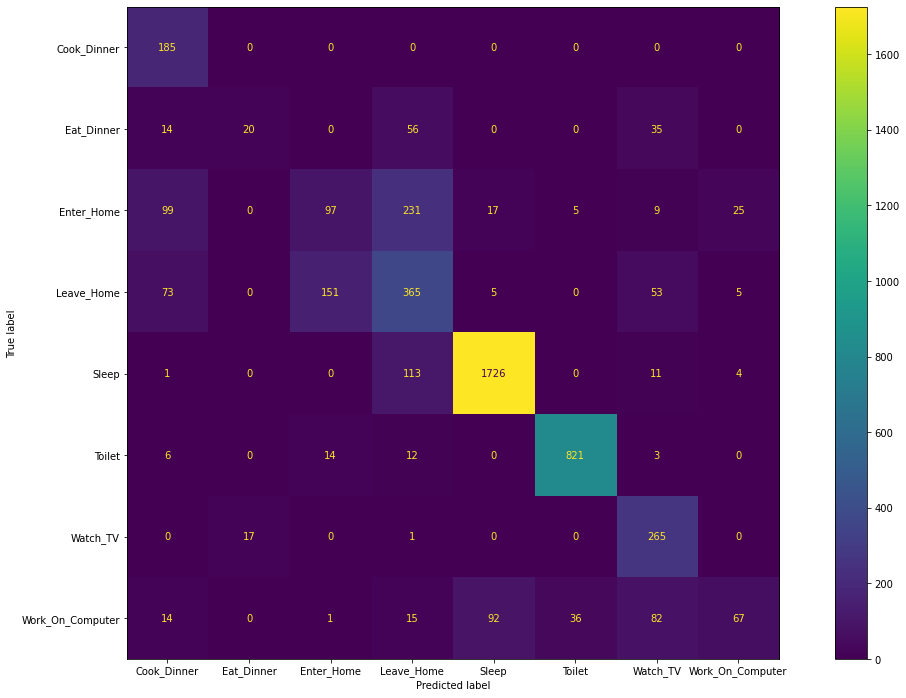

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
plt.xticks(rotation=180)
plot_confusion_matrix(rfc,x_test,y_test,ax=ax)

In [ ]:
print(classification_report(y_test,preds))

                  precision    recall  f1-score   support

     Cook_Dinner       0.47      1.00      0.64       185
      Eat_Dinner       0.54      0.16      0.25       125
      Enter_Home       0.37      0.20      0.26       483
      Leave_Home       0.46      0.56      0.51       652
           Sleep       0.94      0.93      0.93      1855
          Toilet       0.95      0.96      0.96       856
        Watch_TV       0.58      0.94      0.72       283
Work_On_Computer       0.66      0.22      0.33       307

        accuracy                           0.75      4746
       macro avg       0.62      0.62      0.57      4746
    weighted avg       0.75      0.75      0.73      4746



In [ ]:
rfc_accuracy=accuracy_score(y_test, preds)
rfc_accuracy=rfc_accuracy*100
print("The accuracy for Random forest classifier model is",round(rfc_accuracy,2),"%")

The accuracy for Random forest classifier model is 74.72 %


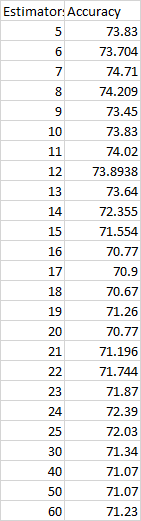

## K-Nearest Neighbour Classifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(x_train, y_train)

knn_preds=knn.predict(x_test) 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


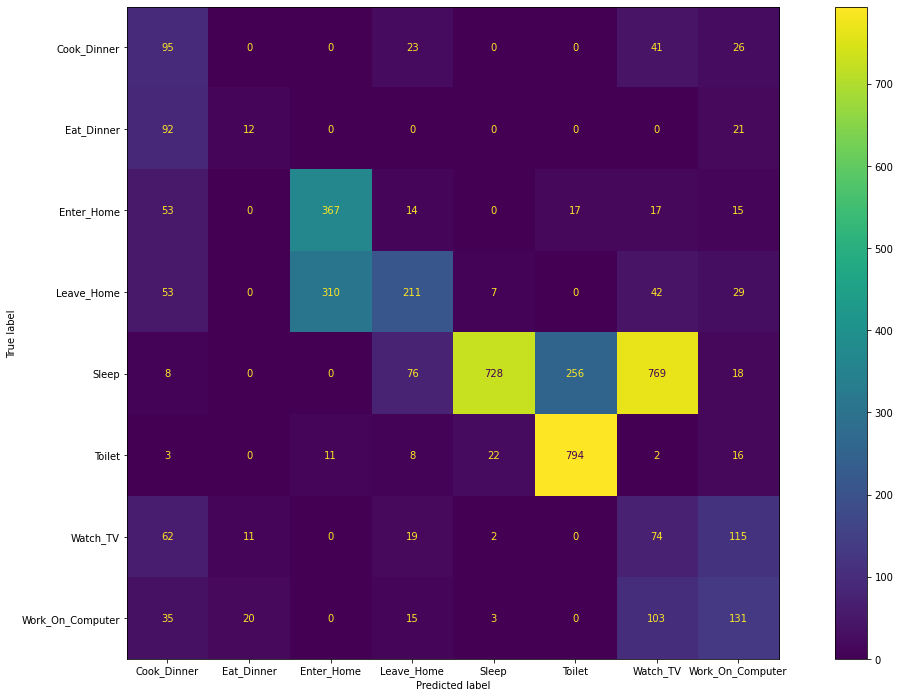

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
plt.xticks(rotation=180)
plot_confusion_matrix(knn,x_test,y_test,ax=ax)

In [ ]:
print(classification_report(y_test,knn_preds))

                  precision    recall  f1-score   support

     Cook_Dinner       0.24      0.51      0.32       185
      Eat_Dinner       0.28      0.10      0.14       125
      Enter_Home       0.53      0.76      0.63       483
      Leave_Home       0.58      0.32      0.41       652
           Sleep       0.96      0.39      0.56      1855
          Toilet       0.74      0.93      0.83       856
        Watch_TV       0.07      0.26      0.11       283
Work_On_Computer       0.35      0.43      0.39       307

        accuracy                           0.51      4746
       macro avg       0.47      0.46      0.42      4746
    weighted avg       0.68      0.51      0.54      4746



In [ ]:
knn_accuracy=accuracy_score(y_test, knn_preds)
knn_accuracy=knn_accuracy*100
print("The accuracy for K-Nearest Neighbour model is",round(knn_accuracy,2),"%")

The accuracy for K-Nearest Neighbour model is 50.82 %


In [ ]:
df1

,lastSensorEventHours,windowDuration,prevDominantSensor1,prevDominantSensor2,lastSensorID,lastSensorLocation,lastMotionLocation,sensorCount-Bathroom,sensorCount-Bedroom,sensorCount-Ignore,sensorCount-OutsideDoor,sensorElTime-Bathroom,sensorElTime-DiningRoom,sensorElTime-Hall,sensorElTime-Ignore,sensorElTime-OutsideDoor,activity
0,0.0,63.0,0.0,0.0,1.0,1.0,1.0,0.0,33.34,1.01,0.00,86400.0,86400.000000,86400.000000,0.756853,86400.000000,Sleep
1,0.0,63.0,0.0,0.0,5.0,5.0,1.0,0.0,32.33,2.02,0.00,86400.0,86400.000000,86400.000000,0.000000,86400.000000,Sleep
2,0.0,53.0,0.0,0.0,1.0,1.0,1.0,0.0,32.31,2.04,0.00,86400.0,86400.000000,86400.000000,0.023990,86400.000000,Sleep
3,0.0,67.0,0.0,0.0,5.0,5.0,1.0,0.0,31.29,3.06,0.00,86400.0,86400.000000,86400.000000,0.000000,86400.000000,Sleep
4,0.0,65.0,0.0,0.0,1.0,1.0,1.0,0.0,31.26,3.09,0.00,86400.0,86400.000000,86400.000000,0.026903,86400.000000,Sleep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71062,15.0,48.0,5.0,5.0,9.0,9.0,9.0,0.0,12.37,10.58,11.40,86400.0,227.824331,213.428812,3.561320,0.000000,Leave_Home
71063,15.0,48.0,5.0,5.0,5.0,5.0,9.0,0.0,12.48,10.37,11.50,86400.0,228.035583,213.640064,0.000000,0.211252,Leave_Home
71064,15.0,46.0,5.0,5.0,1.0,1.0,1.0,0.0,12.29,10.46,11.60,86400.0,228.066083,213.670564,0.030500,0.241752,Leave_Home
71065,15.0,49.0,5.0,5.0,9.0,9.0,9.0,0.0,12.40,9.25,12.70,86400.0,230.820038,216.424519,2.784455,0.000000,Leave_Home


In [ ]:
df2

,lastSensorEventHours,windowDuration,prevDominantSensor1,prevDominantSensor2,lastSensorID,lastSensorLocation,lastMotionLocation,sensorCount-Bathroom,sensorCount-Bedroom,sensorCount-Ignore,sensorCount-OutsideDoor,sensorElTime-Bathroom,sensorElTime-DiningRoom,sensorElTime-Hall,sensorElTime-Ignore,sensorElTime-OutsideDoor,activity
87,1.0,35.0,6.0,6.0,0.0,0.0,0.0,1.00,6.21,0.0,0.0,0.000000,86400.0,86400.0,86400.0,86400.000000,Toilet
88,1.0,38.0,6.0,6.0,0.0,0.0,0.0,2.01,6.27,0.0,0.0,0.000000,86400.0,86400.0,86400.0,86400.000000,Toilet
89,1.0,36.0,6.0,6.0,0.0,0.0,0.0,3.03,6.33,0.0,0.0,0.000000,86400.0,86400.0,86400.0,86400.000000,Toilet
90,1.0,34.0,6.0,6.0,0.0,0.0,0.0,4.06,6.39,0.0,0.0,0.000000,86400.0,86400.0,86400.0,86400.000000,Toilet
91,1.0,35.0,6.0,6.0,0.0,0.0,0.0,5.10,6.45,0.0,0.0,0.000000,86400.0,86400.0,86400.0,86400.000000,Toilet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216188,19.0,212.0,6.0,6.0,7.0,7.0,7.0,0.00,0.00,0.0,0.0,14325.503992,86400.0,86400.0,86400.0,5526.906841,Watch_TV
216189,19.0,217.0,6.0,6.0,7.0,7.0,7.0,0.00,0.00,0.0,0.0,14331.354197,86400.0,86400.0,86400.0,5532.757046,Watch_TV
216190,19.0,217.0,6.0,6.0,7.0,7.0,7.0,0.00,0.00,0.0,0.0,14332.447469,86400.0,86400.0,86400.0,5533.850318,Watch_TV
216191,19.0,216.0,6.0,6.0,7.0,7.0,7.0,0.00,0.00,0.0,0.0,14333.045191,86400.0,86400.0,86400.0,5534.448040,Watch_TV


In [ ]:
df1["activity"].unique()

array(['Sleep', 'Toilet', 'Leave_Home', 'Enter_Home', 'Cook_Dinner',
       'Eat_Dinner', 'Watch_TV', 'Work_On_Computer'], dtype=object)

In [ ]:
df2["activity"].unique()

array(['Toilet', 'Watch_TV', 'Sleep', 'Leave_Home', 'Enter_Home',
       'Work_On_Computer', 'Cook_Dinner', 'Eat_Dinner'], dtype=object)

In [ ]:
df3=pd.concat([df1,df2])
df3

,lastSensorEventHours,windowDuration,prevDominantSensor1,prevDominantSensor2,lastSensorID,lastSensorLocation,lastMotionLocation,sensorCount-Bathroom,sensorCount-Bedroom,sensorCount-Ignore,sensorCount-OutsideDoor,sensorElTime-Bathroom,sensorElTime-DiningRoom,sensorElTime-Hall,sensorElTime-Ignore,sensorElTime-OutsideDoor,activity
0,0.0,63.0,0.0,0.0,1.0,1.0,1.0,0.0,33.34,1.01,0.0,86400.000000,86400.0,86400.0,0.756853,86400.000000,Sleep
1,0.0,63.0,0.0,0.0,5.0,5.0,1.0,0.0,32.33,2.02,0.0,86400.000000,86400.0,86400.0,0.000000,86400.000000,Sleep
2,0.0,53.0,0.0,0.0,1.0,1.0,1.0,0.0,32.31,2.04,0.0,86400.000000,86400.0,86400.0,0.023990,86400.000000,Sleep
3,0.0,67.0,0.0,0.0,5.0,5.0,1.0,0.0,31.29,3.06,0.0,86400.000000,86400.0,86400.0,0.000000,86400.000000,Sleep
4,0.0,65.0,0.0,0.0,1.0,1.0,1.0,0.0,31.26,3.09,0.0,86400.000000,86400.0,86400.0,0.026903,86400.000000,Sleep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216188,19.0,212.0,6.0,6.0,7.0,7.0,7.0,0.0,0.00,0.00,0.0,14325.503992,86400.0,86400.0,86400.000000,5526.906841,Watch_TV
216189,19.0,217.0,6.0,6.0,7.0,7.0,7.0,0.0,0.00,0.00,0.0,14331.354197,86400.0,86400.0,86400.000000,5532.757046,Watch_TV
216190,19.0,217.0,6.0,6.0,7.0,7.0,7.0,0.0,0.00,0.00,0.0,14332.447469,86400.0,86400.0,86400.000000,5533.850318,Watch_TV
216191,19.0,216.0,6.0,6.0,7.0,7.0,7.0,0.0,0.00,0.00,0.0,14333.045191,86400.0,86400.0,86400.000000,5534.448040,Watch_TV


## LSTM-RNN Model

In [ ]:
x_train.shape,x_test.shape

((51544, 16), (4746, 16))

In [ ]:
y_train.shape,y_test.shape

((51544,), (4746,))

In [ ]:
#X=df3.drop("activity",axis=1)

In [ ]:
#Y=df3["activity"]

In [ ]:
#X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=100)

In [ ]:
#X_train.shape,X_test.shape

((39403, 16), (16887, 16))

In [ ]:
#Y_train.shape,Y_test.shape

((39403,), (16887,))

In [ ]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'
Y_train= label_encoder.fit_transform(y_train)

In [ ]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'
Y_test= label_encoder.fit_transform(y_test)

In [ ]:
X_train=np.reshape(np.array(x_train),(51544,-1,16))
X_test=np.reshape(np.array(x_test),(4746,-1,16))

In [ ]:
from keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [ ]:
X_train.shape,X_test.shape

((51544, 1, 16), (4746, 1, 16))

In [ ]:
Y_train.shape,Y_test.shape

((51544, 8), (4746, 8))

## Validation Data

In [ ]:
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.8,random_state=100)

In [ ]:
#X_test,X_val,Y_test,Y_val=train_test_split(X_test,Y_test,test_size=0.5,random_state=100)

In [ ]:
#X_test.shape,Y_test.shape

In [ ]:
#X_val.shape,Y_val.shape

## LSTM Architecture

In [ ]:
model = Sequential()
model.add(LSTM(256,input_dim=16, recurrent_activation="sigmoid",activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               279552    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 5

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=20,validation_data=(X_test,Y_test))

Epoch 1/20
323/323 [==============================] - 9s 12ms/step - loss: 168.9851 - accuracy: 0.3946 - val_loss: 485.3291 - val_accuracy: 0.0560
Epoch 2/20
323/323 [==============================] - 2s 7ms/step - loss: 2.8536 - accuracy: 0.5245 - val_loss: 420.4791 - val_accuracy: 0.0662
Epoch 3/20
323/323 [==============================] - 2s 7ms/step - loss: 2.0362 - accuracy: 0.5336 - val_loss: 389.8324 - val_accuracy: 0.0611
Epoch 4/20
323/323 [==============================] - 2s 7ms/step - loss: 1.8358 - accuracy: 0.5374 - val_loss: 350.6392 - val_accuracy: 0.0539
Epoch 5/20
323/323 [==============================] - 3s 8ms/step - loss: 1.6379 - accuracy: 0.5396 - val_loss: 327.3179 - val_accuracy: 0.0381
Epoch 6/20
323/323 [==============================] - 2s 7ms/step - loss: 1.5715 - accuracy: 0.5406 - val_loss: 327.3675 - val_accuracy: 0.0394
Epoch 7/20
323/323 [==============================] - 2s 7ms/step - loss: 1.5718 - accuracy: 0.5403 - val_loss: 310.4133 - val_accura

In [ ]:
validation_loss,lstm_accuracy = model.evaluate(X_test, Y_test, batch_size=32, verbose=0)

In [ ]:
lstm_accuracy=lstm_accuracy*100

In [ ]:
print("The accuracy for LSTM model is",round(lstm_accuracy,2),"%")

The accuracy for LSTM model is 3.56 %


## Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


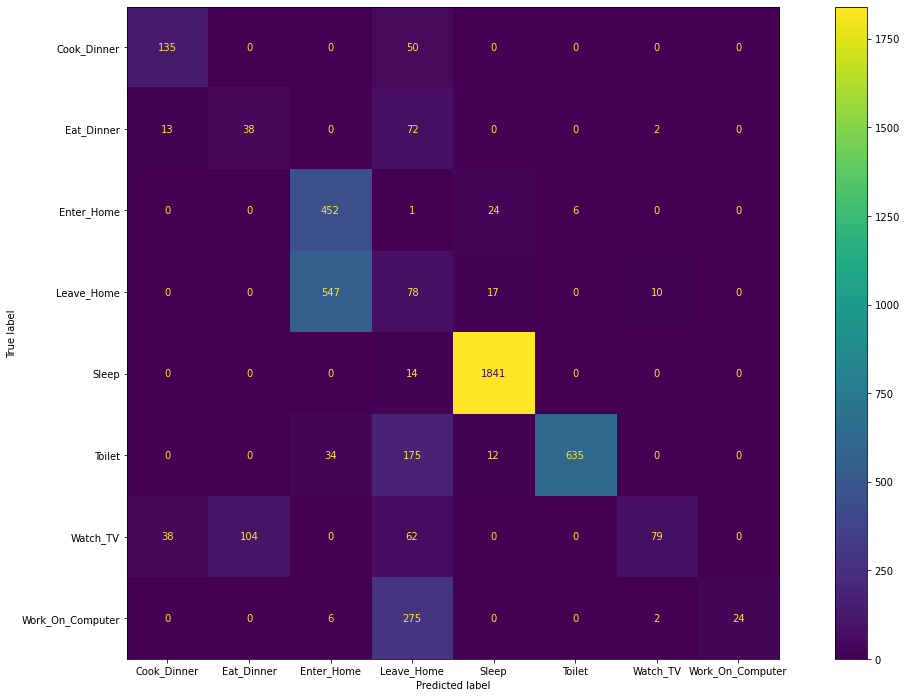

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
plt.xticks(rotation=180)
plot_confusion_matrix(gnb,x_test,y_test,ax=ax)

In [ ]:
print(classification_report(y_test,gnb_pred))

                  precision    recall  f1-score   support

     Cook_Dinner       0.73      0.73      0.73       185
      Eat_Dinner       0.27      0.30      0.28       125
      Enter_Home       0.44      0.94      0.59       483
      Leave_Home       0.11      0.12      0.11       652
           Sleep       0.97      0.99      0.98      1855
          Toilet       0.99      0.74      0.85       856
        Watch_TV       0.85      0.28      0.42       283
Work_On_Computer       1.00      0.08      0.15       307

        accuracy                           0.69      4746
       macro avg       0.67      0.52      0.51      4746
    weighted avg       0.77      0.69      0.68      4746



In [ ]:
gnb_accuracy=accuracy_score(y_test, gnb_pred)
gnb_accuracy=gnb_accuracy*100
print("The accuracy for Gaussian Naive Bayes model is",round(gnb_accuracy,2),"%")

The accuracy for Gaussian Naive Bayes model is 69.15 %


## Multinomial Naive Bayes

In [ ]:
MNB = MultinomialNB()
MNB.fit(x_train, y_train)
MNB_pred = MNB.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


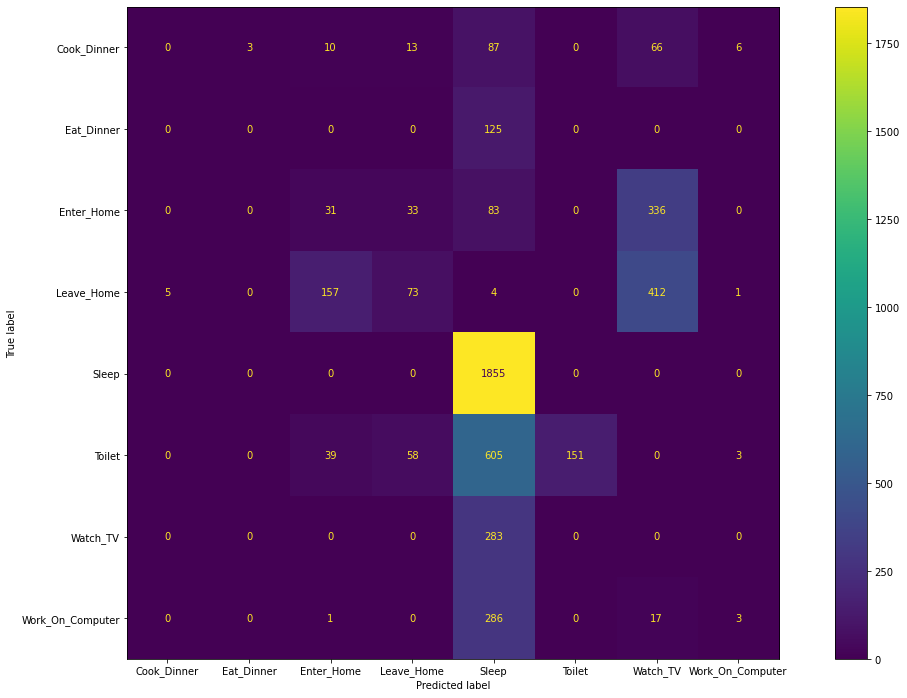

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
plt.xticks(rotation=180)
plot_confusion_matrix(MNB,x_test,y_test,ax=ax)

In [ ]:
print(classification_report(y_test, MNB_pred))

                  precision    recall  f1-score   support

     Cook_Dinner       0.00      0.00      0.00       185
      Eat_Dinner       0.00      0.00      0.00       125
      Enter_Home       0.13      0.06      0.09       483
      Leave_Home       0.41      0.11      0.18       652
           Sleep       0.56      1.00      0.72      1855
          Toilet       1.00      0.18      0.30       856
        Watch_TV       0.00      0.00      0.00       283
Work_On_Computer       0.23      0.01      0.02       307

        accuracy                           0.45      4746
       macro avg       0.29      0.17      0.16      4746
    weighted avg       0.48      0.45      0.37      4746



In [ ]:
MNB_accuracy=accuracy_score(y_test, MNB_pred)
MNB_accuracy=MNB_accuracy*100
print("The accuracy for Multinomial Naive Bayes model is",round(MNB_accuracy,2),"%")

The accuracy for Multinomial Naive Bayes model is 44.52 %


## X Gradient Boost

In [ ]:
xgb = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softmax',
 nthread=4,
 scale_pos_weight=1,
 seed= 4353)

In [ ]:
xgb.fit(x_train, y_train)
XGB_pred= xgb.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


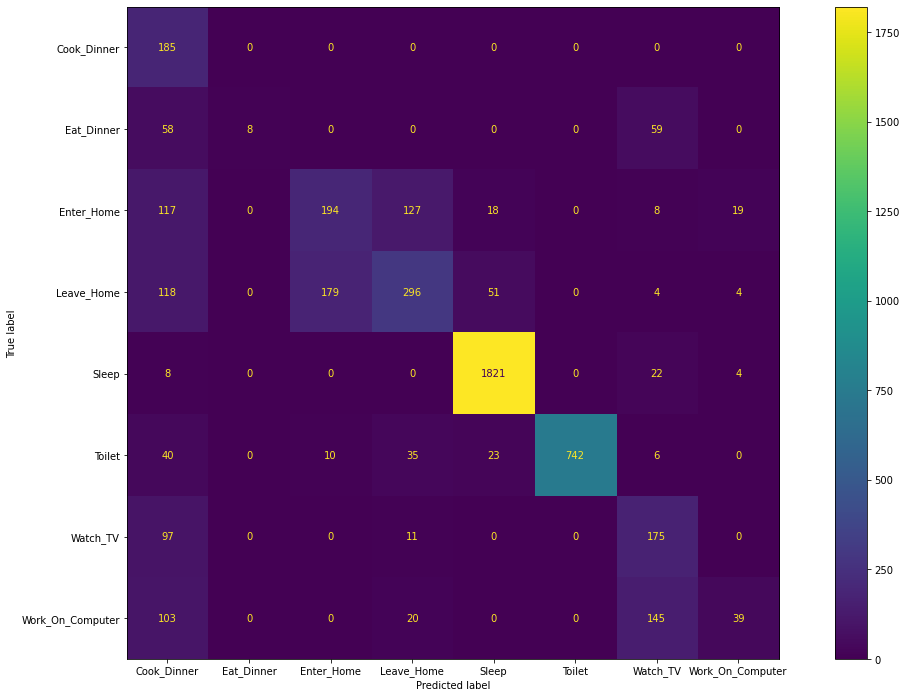

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
plt.xticks(rotation=180)
plot_confusion_matrix(xgb,x_test,y_test,ax=ax)

In [ ]:
print(classification_report(y_test, XGB_pred))

                  precision    recall  f1-score   support

     Cook_Dinner       0.25      1.00      0.41       185
      Eat_Dinner       1.00      0.06      0.12       125
      Enter_Home       0.51      0.40      0.45       483
      Leave_Home       0.61      0.45      0.52       652
           Sleep       0.95      0.98      0.97      1855
          Toilet       1.00      0.87      0.93       856
        Watch_TV       0.42      0.62      0.50       283
Work_On_Computer       0.59      0.13      0.21       307

        accuracy                           0.73      4746
       macro avg       0.67      0.56      0.51      4746
    weighted avg       0.79      0.73      0.72      4746



In [ ]:
XGB_accuracy=accuracy_score(y_test, XGB_pred)
XGB_accuracy=XGB_accuracy*100
print("The accuracy for X-Gradient Boost model is",round(XGB_accuracy,2),"%")

The accuracy for X-Gradient Boost model is 72.9 %


## Plotting All Accuracies

In [ ]:
model = ['Random Forest','KNN','LSTM','GaussianNaiveBayes','MultinomialNaiveBayes','X-GradientBoost']
#acc = [rfc_accuracy, knn_accuracy,lstm_accuracy,gnb_accuracy,MNB_accuracy,XGB_accuracy]
acc=[74.72,50.82,3.56,69.15,44.52,72.9]
t=['Random Forest:74.72%','KNN:50.82%','LSTM:3.56%','GaussianNaiveBayes:69.15%','MultinomialNaiveBayes:44.52%','X-GradientBoost:72.9%']

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=model,
    y=acc,
    mode="lines+markers+text",
    name="Lines, Markers and Text",
    text=t,
    textposition="bottom center",
    textfont=dict(
        family="sans serif",
        size=12,
        color="crimson"
    )
))
fig.update_layout(showlegend=False)

fig.show()

In [ ]:
#x_train=df2.drop("activity",axis=1)

In [ ]:
#x_test=df1.drop("activity",axis=1)

In [ ]:
#y_train=df2["activity"]

In [ ]:
#y_test=df1["activity"]

In [ ]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'
y_train= label_encoder.fit_transform(y_train)

In [ ]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'
y_test= label_encoder.fit_transform(y_test)

In [ ]:
#x_train.shape,x_test.shape

((51544, 16), (4746, 16))

In [ ]:

#y_train.shape,y_test.shape

((51544,), (4746,))

In [ ]:

timesteps=1

In [ ]:
#x_train, y_train = [], []
x_train=np.reshape(np.array(x_train),(51544,-1,16))
x_test=np.reshape(np.array(x_test),(4746,-1,16))

In [ ]:
x_train.shape,x_test.shape

((51544, 1, 16), (4746, 1, 16))

In [ ]:
y_train.shape,y_test.shape

((51544,), (4746,))

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train.shape,y_test.shape

((51544, 8), (4746, 8))

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
type(x_test)

numpy.ndarray

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
type(y_test)

numpy.ndarray

In [ ]:
# model = Sequential()
# model.add(LSTM(256,input_dim=16,activation='relu'))
# model.add(Dense(128,activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(8, activation='softmax'))

In [ ]:
# model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_80 (LSTM)              (None, 256)               279552    
                                                                 
 dense_57 (Dense)            (None, 128)               32896     
                                                                 
 dense_58 (Dense)            (None, 64)                8256      
                                                                 
 dense_59 (Dense)            (None, 8)                 520       
                                                                 
Total params: 321,224
Trainable params: 321,224
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
1611/1611 [==============================] - 20s 11ms/step - loss: 34.9278 - accuracy: 0.5380 - val_loss: 381.4827 - val_accuracy: 0.1075
Epoch 2/20
1611/1611 [==============================] - 9s 5ms/step - loss: 4.6363 - accuracy: 0.6358 - val_loss: 357.6090 - val_accuracy: 0.1182
Epoch 3/20
1611/1611 [==============================] - 9s 5ms/step - loss: 2.0236 - accuracy: 0.6714 - val_loss: 341.5053 - val_accuracy: 0.1271
Epoch 4/20
1611/1611 [==============================] - 8s 5ms/step - loss: 1.1119 - accuracy: 0.7177 - val_loss: 296.7584 - val_accuracy: 0.1279
Epoch 5/20
1611/1611 [==============================] - 8s 5ms/step - loss: 1.0364 - accuracy: 0.7105 - val_loss: 256.4564 - val_accuracy: 0.1502
Epoch 6/20
1611/1611 [==============================] - 9s 5ms/step - loss: 0.8498 - accuracy: 0.7322 - val_loss: 212.4476 - val_accuracy: 0.1498
Epoch 7/20
1611/1611 [==============================] - 10s 6ms/step - loss: 0.7981 - accuracy: 0.7490 - val_loss: 200.54

In [ ]:
#  _, accuracy = model.evaluate(x_test, y_test, batch_size=32, verbose=0)

In [ ]:
# accuracy

0.3175305426120758

In [ ]:
verbose, epochs, batch_size = 2, 2, 100

model = Sequential()
model.add(LSTM(1000,return_sequences=True,input_dim=16,activation='relu'))
model.add(Dropout(0.8))
model.add(LSTM(1000,return_sequences=True, input_shape=(timesteps, x_train.shape[2]),activation='relu'))
model.add(Dropout(0.8))
#model.add(LSTM(1000,return_sequences=True, input_shape=(timesteps, x_train.shape[2])))
#model.add(Dropout(0.8))
#model.add(LSTM(1000,return_sequences=True, input_shape=(timesteps, x_train.shape[2])))
#model.add(Dropout(0.8))
#model.add(LSTM(1000,return_sequences=True, input_shape=(timesteps, x_train.shape[2])))
#model.add(Dropout(0.8))
#model.add(Dense(1024,activation='relu'))
#model.add(Dense(512,activation='relu'))
# model.add(Dense(1,activation='relu'))

#model.add(LSTM(100,return_sequences=True, input_shape=(timesteps, x_train.shape[2])))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_81 (LSTM)              (None, None, 1000)        4068000   
                                                                 
 dropout_60 (Dropout)        (None, None, 1000)        0         
                                                                 
 lstm_82 (LSTM)              (None, None, 1000)        8004000   
                                                                 
 dropout_61 (Dropout)        (None, None, 1000)        0         
                                                                 
 dense_60 (Dense)            (None, None, 64)          64064     
                                                                 
 dense_61 (Dense)            (None, None, 8)           520       
                                                                 
Total params: 12,136,584
Trainable params: 12,136,584

In [ ]:
model.fit(x_train,y_train,epochs=10, batch_size=64, verbose=1,validation_data=(x_test,y_test))

Epoch 1/10


ValueError: ignored

In [ ]:
 _, accuracy = model.evaluate(x_test, y_test, batch_size=32, verbose=0)

ValueError: ignored

In [ ]:
accuracy

0.026337968185544014

In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 7.6min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 7.7min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 7.6min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 7.7min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 7.7min


In [ ]:
print(grid.best_params_)


In [ ]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 51))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=2)
  
# fitting the model for grid search
grid_search=grid.fit(x_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] END ......................................n_neighbors=1; total time=   2.1s
[CV] END ......................................n_neighbors=1; total time=   1.9s
[CV] END ......................................n_neighbors=1; total time=   1.9s
[CV] END ......................................n_neighbors=1; total time=   2.0s
[CV] END ......................................n_neighbors=1; total time=   2.2s
[CV] END ......................................n_neighbors=1; total time=   1.9s
[CV] END ......................................n_neighbors=1; total time=   1.9s
[CV] END ......................................n_neighbors=1; total time=   1.9s
[CV] END ......................................n_neighbors=1; total time=   1.9s
[CV] END ......................................n_neighbors=1; total time=   1.9s
[CV] END ......................................n_neighbors=2; total time=   2.6s
[CV] END .....................................

In [ ]:
print(grid_search.best_params_)


{'n_neighbors': 48}
